In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_curve, auc, precision_recall_curve
%config IPCompleter.greedy=True

# **Параметры Варианта 18**

In [2]:
neg_m1 = 10
neg_m2 = 23
neg_std1 = math.sqrt(3)
neg_std2 = math.sqrt(3)
neg_n = 50

pos_m1 = 7
pos_m2 = 10
pos_std1 = math.sqrt(2)
pos_std2 = math.sqrt(2)
pos_n = 50

# **Ход работы**

In [3]:
neg_data = pd.DataFrame(data={'x1': np.random.normal(neg_m1, neg_std1, neg_n), 
                              'x2': np.random.normal(neg_m2, neg_std2, neg_n),
                              'y': np.full(neg_n, -1)}, 
                              index=range(1, neg_n + 1))

In [4]:
neg_data.head()

,x1,x2,y
1,7.808771,23.654390,-1
2,10.142106,23.347574,-1
3,9.763944,24.376620,-1
4,10.987943,21.995953,-1
5,13.098906,23.407113,-1


In [5]:
pos_data = pd.DataFrame(data={'x1': np.random.normal(pos_m1, pos_std1, pos_n), 
                              'x2': np.random.normal(pos_m2, pos_std2, pos_n), 
                              'y': np.ones(pos_n)}, 
                        index=range(neg_n + 1, neg_n + pos_n + 1))

In [6]:
pos_data.head()

,x1,x2,y
51,9.843596,8.726654,1.0
52,6.212831,10.109542,1.0
53,6.392661,9.238019,1.0
54,7.017362,11.383851,1.0
55,7.799204,9.201811,1.0


In [7]:
data = pd.concat([neg_data, pos_data])

In [8]:
data

,x1,x2,y
1,7.808771,23.654390,-1.0
2,10.142106,23.347574,-1.0
3,9.763944,24.376620,-1.0
4,10.987943,21.995953,-1.0
5,13.098906,23.407113,-1.0
...,...,...,...
96,9.134969,10.146209,1.0
97,9.251247,12.246158,1.0
98,7.531509,7.146659,1.0
99,7.224150,7.006161,1.0


# **Отображение**

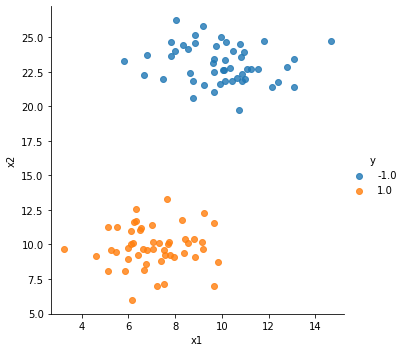

In [9]:
sns.lmplot(x='x1', y='x2', data=data, hue='y', fit_reg=False)

# **Классификатор**

In [10]:
gnb = GaussianNB()

In [11]:
X = data.drop('y', axis=1)
y = data.y

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [13]:
gnb.fit(X_train, y_train)

GaussianNB()

In [14]:
y_pred = gnb.predict(X_test)
y_pred_proba = gnb.predict_proba(X_test)

In [15]:
gnb.score(X_test, y_test)

1.0

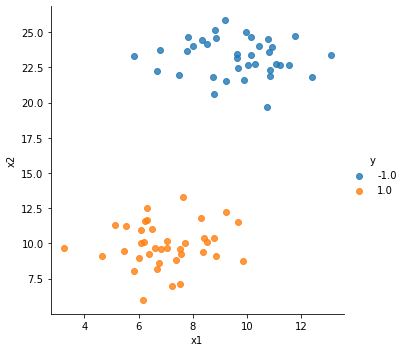

In [18]:
 sns.lmplot(x='x1', y='x2', data=X_train.assign(y=y_train), hue='y', fit_reg=False)

# **Матрица ошибок**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


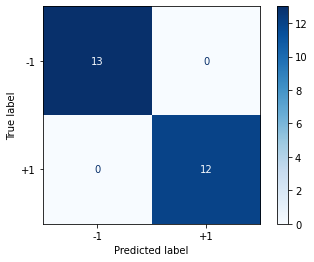

In [23]:
plot_confusion_matrix(gnb, X_test, y_test, display_labels=['-1', '+1'], cmap=plt.cm.Blues)

# **ROC-кривая**

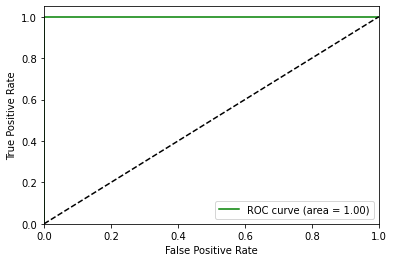

In [17]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='green',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

# **PR-кривая**

In [20]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel() 
P = tp + fn
N = fp + tn

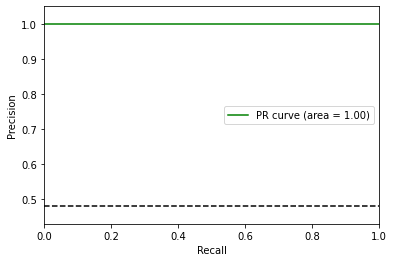

In [21]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(recall, precision, color='green', 
         label='PR curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [P / (P+N), P / (P+N)], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([P / (P+N) - 0.05, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="best")

In [22]:
cross_val_score(gnb, X_train, y_train, cv=5)

array([1., 1., 1., 1., 1.])